In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import json

In [3]:
top_20_antisemitic_references = pd.read_csv('top_anti.csv')


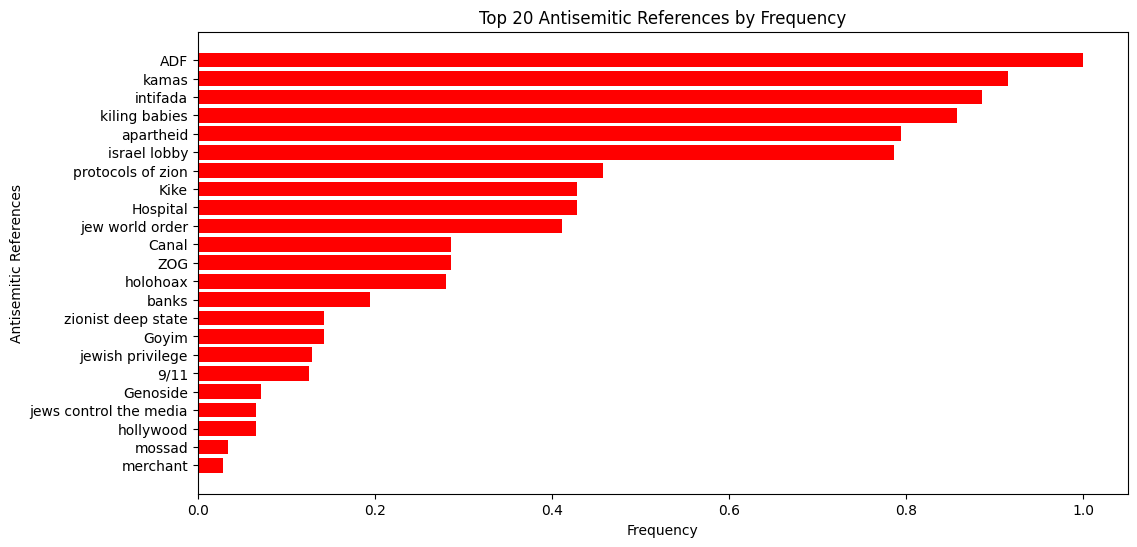

In [6]:
# Sort data by frequency
sorted_indices = np.argsort(top_20_antisemitic_references['num'])[::-1]
sorted_references = [top_20_antisemitic_references['ref'][i] for i in sorted_indices]
sorted_num = [top_20_antisemitic_references['num'][i] for i in sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_references, sorted_num, color='red')
plt.xlabel("Frequency")
plt.ylabel("Antisemitic References")
plt.title("Top 20 Antisemitic References by Frequency")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


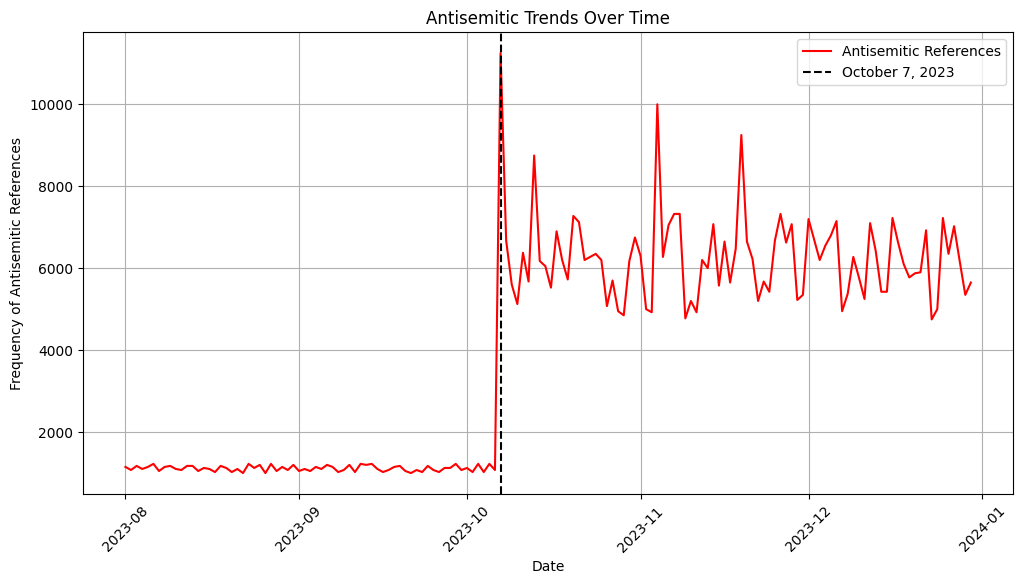

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.read_csv('top_anti_daily.csv')
# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(df2["Date"], df2["Antisemitic References"], label="Antisemitic References", color="red")
plt.axvline(pd.Timestamp("2023-10-07"), color="black", linestyle="--", label="October 7, 2023")
plt.xlabel("Date")
plt.ylabel("Frequency of Antisemitic References")
plt.title("Antisemitic Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


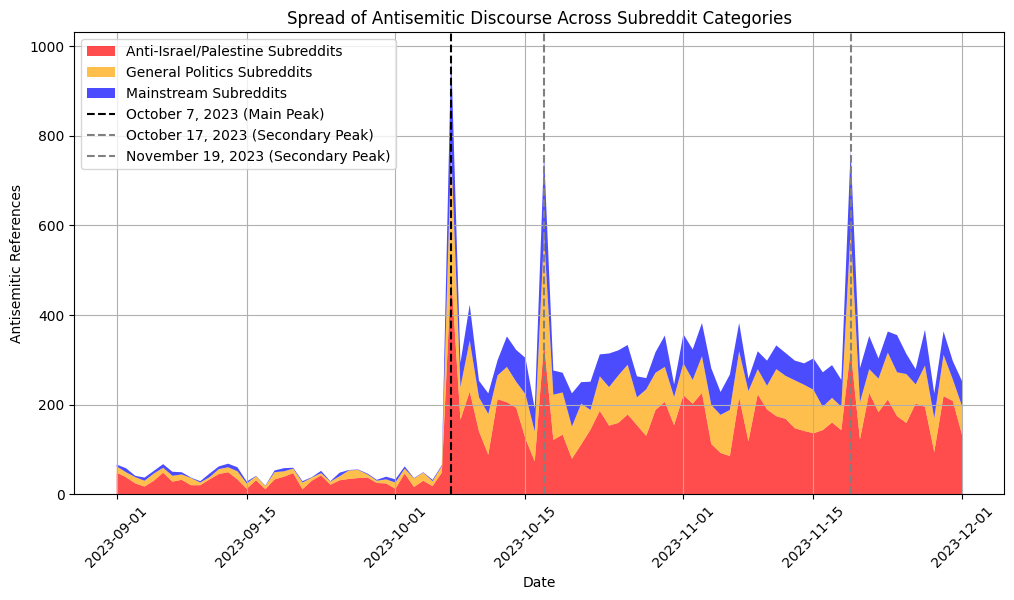

In [28]:
df = pd.read_csv('subreddit.csv')

# Plotting Stacked Area Chart with emphasized peaks
plt.figure(figsize=(12, 6))
plt.stackplot(df.index, df["Anti-Israel/Palestine Subreddits"], df["General Politics Subreddits"], df["Mainstream Subreddits"],
              labels=["Anti-Israel/Palestine Subreddits", "General Politics Subreddits", "Mainstream Subreddits"],
              colors=["red", "orange", "blue"], alpha=0.7)

# Highlight peaks
plt.axvline(pd.Timestamp("2023-10-07"), color="black", linestyle="--", label="October 7, 2023 (Main Peak)")
plt.axvline(pd.Timestamp("2023-10-17"), color="gray", linestyle="--", label="October 17, 2023 (Secondary Peak)")
plt.axvline(pd.Timestamp("2023-11-19"), color="gray", linestyle="--", label="November 19, 2023 (Secondary Peak)")

plt.xlabel("Date")
plt.ylabel("Antisemitic References")
plt.title("Spread of Antisemitic Discourse Across Subreddit Categories")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


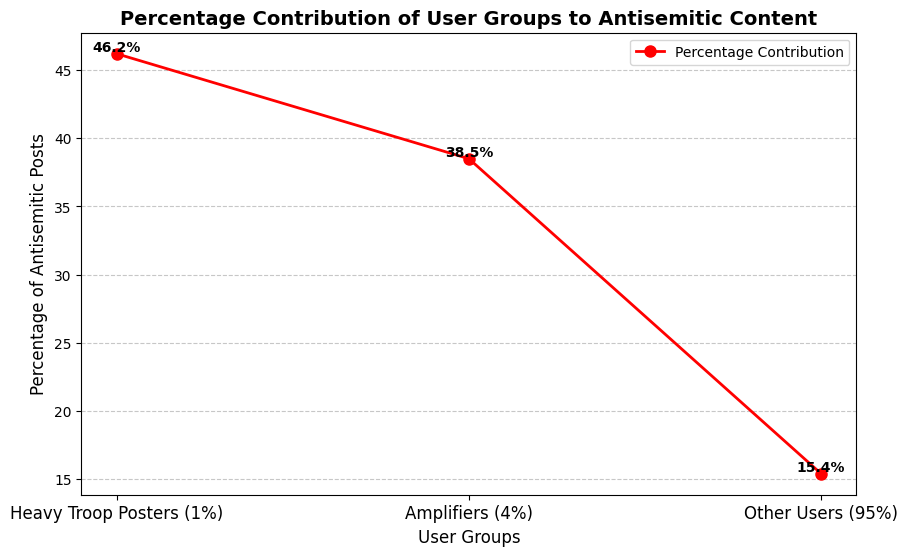

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
users_df = pd.read_csv('users.csv')

def classify_user(score):
    if score >= np.percentile(users_df["centrality_score"], 99):
        return "Heavy Troop Posters"
    elif score >= np.percentile(users_df["centrality_score"], 95):
        return "Amplifiers"
    else:
        return "Other Users"

users_df["group"] = users_df["centrality_score"].apply(classify_user)

# Display summary of groups
group_counts = users_df["group"].value_counts()
print("User Group Distribution:")
print(group_counts)


user_groups = ["Heavy Troop Posters (1%)", "Amplifiers (4%)", "Other Users (95%)"]
percentages = [46.2, 38.5, 15.4]  # Percentage contribution of each group

# Define X-axis positions
x_positions = np.arange(len(user_groups))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_positions, percentages, marker="o", linestyle="-", color="red", linewidth=2, markersize=8, label="Percentage Contribution")

# Adding data labels
for i, pct in enumerate(percentages):
    ax.text(x_positions[i], pct+ 0.2, f"{pct:.1f}%", ha='center', fontsize=10, fontweight="bold")

# Labels and Titles
ax.set_xticks(x_positions)
ax.set_xticklabels(user_groups, fontsize=12)
ax.set_ylabel("Percentage of Antisemitic Posts", fontsize=12)
ax.set_xlabel("User Groups", fontsize=12)
ax.set_title("Percentage Contribution of User Groups to Antisemitic Content", fontsize=14, fontweight="bold")

# Grid and aesthetics
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.legend()

# Show the plot
plt.show()
